# LinearRegression 实验

### 一、原方案計算數據集，使用numpy回歸計算

In [3]:
#!/usr/bin/env python3

import random
import argparse
import numpy as np


# dataset file
DATASET_FILE = "LinearRegressionDataSet_2.txt"

# default learning rate
ALPHA = 0.01
# default min batch size
MIN_BATCH = 200
# default learning times
LEARNING_TIMES = 4500


def generate_min_batch(dataset, batch_size):
    """
    Generate Min Batch.
    """
    dataset_shape = dataset.shape
    if dataset_shape[0] < batch_size:
        batch_size = dataset_shape[0]

    row_indexes = [i for i in range(dataset_shape[0])]
    random.shuffle(row_indexes)
    random_row_indexes = row_indexes[:batch_size]
    hsplit_indice = dataset_shape[1] - 1
    random_dataset = (dataset[random_row_indexes, :hsplit_indice],
                      dataset[random_row_indexes, hsplit_indice:])
    return random_dataset


def hypothesis(input_x, θ):
    """
    Hypothesis function 假设函数

    hθ(x) = θ.T * x
    """
    res = np.dot(input_x, θ.T)
    return res


def deviation(input_x, output_y, θ):
    """
    Deviation function 代价/偏差函数
    """
    res = sum([pow(hypothesis(x, θ) - y, 2) for x, y in zip(input_x, output_y)])
    return res / (2 * input_x.shape[0])


def gradientDescent(dataset, batch_size, learning_rate, learning_times):
    print("------Start gradient descent------")
    process = 0

    hsplit_indice = (dataset.shape)[1] - 1
    θ = np.random.rand(1, hsplit_indice)
    # print(θ)  # [[ 0.92081042  0.78857252]]
    # print(θ.shape)  # (1, 2)

    _θ = θ.copy()
    while process < learning_times:
        batch_data = generate_min_batch(dataset, batch_size)
        input_x = batch_data[0]
        output_y = batch_data[1]

        for i in range(θ.shape[1]):
            derivative = np.dot(
                (np.array([hypothesis(row, θ) for row in input_x]) - output_y).T,
                input_x[:, i:i+1])
            avg_derivative = derivative / batch_size
            # θ = θ - αJ(θ)'
            _θ[0, i] = θ[0, i] - learning_rate * avg_derivative

        θ = _θ
        # calculate deviation
        batch_test_data = generate_min_batch(dataset, batch_size)
        current_deviation = deviation(batch_test_data[0], batch_test_data[1], θ)
        if (process % 10 == 0):
            print("step %d, deviation %2f" % (process, current_deviation))
            print("θ: %s" % (θ))
        process += 1

    print("θ value is: %s" % (θ))
    print("------End gradient descent------")


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument('--batch', type=int, default=MIN_BATCH)
    parser.add_argument('--epoch', type=int, default=LEARNING_TIMES)
    parser.add_argument('--rate', type=float, default=ALPHA)

    args = parser.parse_args()
    dataset = np.loadtxt(DATASET_FILE, dtype=np.float64)
    gradientDescent(dataset, args.batch, args.rate, args.epoch)

usage: __main__.py [-h] [--batch BATCH] [--epoch EPOCH] [--rate RATE]
__main__.py: error: unrecognized arguments: -f /run/user/1000/jupyter/kernel-2da79057-b38f-485f-ad05-1ac8ecebeb6b.json


SystemExit: 2

/home/cgh/.linuxbrew/opt/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### 二、自己的方案

#### 1、初步判斷樣本集

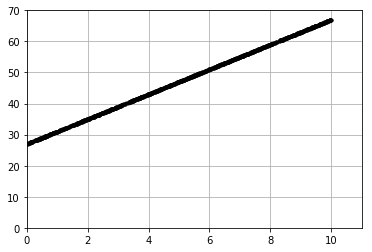

In [4]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

DATASET_FILE = "LinearRegressionDataSet_2.txt"
dataset = np.loadtxt(DATASET_FILE, dtype=np.float64)

def Read_txt():
    dataset = np.loadtxt(DATASET_FILE, dtype=np.float64)
    X = np.zeros((999, 1))
    Y = np.zeros((999, 1))
    for i in range(999):
        X[i] = dataset[i][1]
        Y[i] = dataset[i][2]
    return X,Y

def runplt():
    plt.figure()
    plt.axis([0, 11, 0, 70])
    plt.grid(True)
    return plt

if __name__=="__main__":
    plt=runplt()
    X,Y=Read_txt()
    plt.plot(X, Y,'k.')
    plt.show()

#### 二、判斷類型並計算

由圖可知，此樣本集初步判斷爲一元線性回歸，則套用方程 $$Y=\Theta _{0}+ \Theta _{1}X $$ ,並初步計算殘差平方和

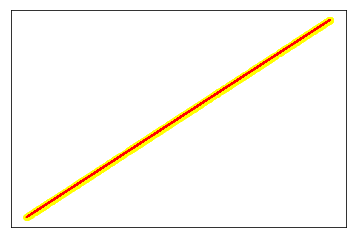

殘差平方和: 0.000000


In [5]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

DATASET_FILE = "LinearRegressionDataSet_2.txt"
dataset = np.loadtxt(DATASET_FILE, dtype=np.float64)

def Read_txt():
    dataset = np.loadtxt(DATASET_FILE, dtype=np.float64)
    X = np.zeros((999, 1))
    Y = np.zeros((999, 1))
    for i in range(999):
        X[i] = dataset[i][1]
        Y[i] = dataset[i][2]
    return X,Y

def show_line(X,Y):
    regr = LinearRegression()
    regr.fit(X, Y)
    plt.scatter(X, Y, color='yellow')
    plt.plot(X, regr.predict(X), color='red')
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
if __name__=="__main__":
    X,Y=Read_txt()
    show_line(X,Y)
    model = LinearRegression()
    model.fit(X, Y)
    print('殘差平方和: %f' % np.mean((model.predict(X) - Y) ** 2))

由圖和差值分析可得，可以使用一元回歸方程，由於使用scikit-learn中的LinearRegression估計器判斷殘方差和爲0,故使此計算 $$ \Theta _{0} 和  \Theta _{1}  $$ 並繪制圖形

Run time 0:00:00.015086
Intercept value (Θ0) [ 26.99999998]
coefficient (Θ1) [[ 4.00000001]]


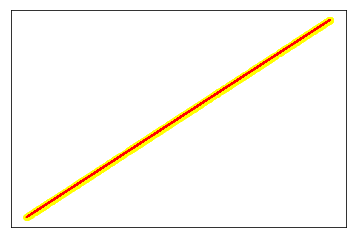

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import random
import datetime

DATASET_FILE = "LinearRegressionDataSet_2.txt"
def Read_txt():
    dataset = np.loadtxt(DATASET_FILE, dtype=np.float64)
    X = np.zeros((999, 1))
    Y = np.zeros((999, 1))
    for i in range(0, 999):
        X[i] = dataset[i][1]
        Y[i] = dataset[i][2]
    return X,Y

def linear_model_main(X_parameters, Y_parameters, predict_value=0):
    # Create linear regression object
    regr = LinearRegression()
    regr.fit(X_parameters, Y_parameters)
    predict_outcome = regr.predict(predict_value)
    predictions = {}
    predictions['intercept'] = regr.intercept_
    predictions['coefficient'] = regr.coef_
    predictions['predicted_value'] = predict_outcome
    return predictions

def show_line(X,Y):
    regr = LinearRegression()
    regr.fit(X, Y)
    plt.scatter(X, Y, color='yellow')
    plt.plot(X, regr.predict(X), color='red')
    plt.xticks(())
    plt.yticks(())
    plt.show()

if __name__ == "__main__":
    b=datetime.datetime.now()
    X,Y=Read_txt()
    result = linear_model_main(X, Y)
    e=datetime.datetime.now()
    print("Run time",(e-b))
    print("Intercept value (Θ0)", result['intercept'])
    print("coefficient (Θ1)", result['coefficient'])
#     print("Predicted value: ", result['predicted_value'])
    show_line(X,Y)

#### 三、 牛頓法+梯度下降（牛頓發由於無法正確模擬，故採用梯度下降輔助計算）（未知不正確）（存在未知錯誤）

In [7]:
#!/usr/bin/env python3

import random
import argparse
import numpy as np


# dataset file
DATASET_FILE = "LinearRegressionDataSet_2.txt"

# default learning rate
ALPHA = 0.06
# default min batch size
MIN_BATCH = 200
# default learning times  
LEARNING_TIMES = 200




def generate_min_batch(dataset, batch_size):
    dataset_shape = dataset.shape
    if dataset_shape[0] < batch_size:
        batch_size = dataset_shape[0]
    row_indexes = [i for i in range(dataset_shape[0])]
    random.shuffle(row_indexes)
    random_row_indexes = row_indexes[:batch_size]
    hsplit_indice = dataset_shape[1] - 1
    random_dataset = (dataset[random_row_indexes, :hsplit_indice],
                      dataset[random_row_indexes, hsplit_indice:])
    return random_dataset


def hypothesis(input_x, θ):
    res = np.dot(input_x, θ.T)
    return res


def deviation(input_x, output_y, θ):
    res = sum([pow(hypothesis(x, θ) - y, 2) for x, y in zip(input_x, output_y)])
    return res / (2 * input_x.shape[0])


# 獨立的海森函數（未知錯誤）
# def hession(input_x,θ):
#     for i in range(θ.shape[1]):
#         res=np.dot(
#             (np.array([hypothesis(row, θ) for row in input_x])),
#             (1-(np.array([hypothesis(row, θ) for row in input_x]))))
#         res=np.dot(res,
#                    input_x[:, i:i+1])
#         res=np.dot(res,
#                    np.transpose(input_x[:,i:i+1]))
#     print(res)
#     return np.linalg.inv(res)

def gradientDescent(dataset, batch_size, learning_rate, learning_times):
    print("------Start gradient descent------")
    process = 0
    FI=0
    hsplit_indice = (dataset.shape)[1] - 1
    θ = np.random.rand(1, hsplit_indice)

    _θ = θ.copy()
    while process < learning_times:
        batch_data = generate_min_batch(dataset, batch_size)
        input_x = batch_data[0]
        output_y = batch_data[1]

        if FI==0:
            for a in range(20):
                for i in range(θ.shape[1]):
                    derivative = np.dot(
                        (np.array([hypothesis(row, θ) for row in input_x]) - output_y).T,
                        input_x[:, i:i + 1])
                    avg_derivative = derivative / batch_size
                    # θ = θ - αJ(θ)'
                    _θ[0, i] = θ[0, i] - learning_rate * avg_derivative
                θ = _θ
        # 牛頓法 由於直接使用牛頓法無法正確收斂，故採用梯度計算輔助牛頓法
        for i in range(θ.shape[1]):
            derivative = np.dot(
                (np.array([hypothesis(row, θ) for row in input_x]) - output_y).T,
                input_x[:, i:i + 1])
            avg_derivative = derivative / batch_size
            # 海森矩陣（位置錯誤）
            h2 = np.dot((np.multiply((np.reshape((input_x[:, 0]).T,
                                                (MIN_BATCH, 1)) - np.array([hypothesis(row, θ) for row in input_x])),
                                    input_x[:, i:i + 1])).T,
                        (np.reshape((input_x[:, 0]).T,
                                    (MIN_BATCH, 1))))
            h3 = (np.array([hypothesis(row, θ) for row in input_x])) * h2
            hession = 0
            for z in range(batch_size):
                hession += h3[z][0]
            Hession = hession / batch_size
            _θ[0, i] = θ[0, i] - avg_derivative / Hession
        F=1
        θ = _θ
        # calculate deviation
        batch_test_data = generate_min_batch(dataset, batch_size)
        current_deviation = deviation(batch_test_data[0], batch_test_data[1], θ)
        if (process % 10 == 0):
            print("step %d, deviation %2f" % (process, current_deviation))
            print("θ: %s" % (θ))
        process += 1
        # 輔助快速判斷是否學習完成
        # if current_deviation<1e-11:
        #     break

    print("θ value is: %s" % (θ))
    print("------End gradient descent------")

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument('--batch', type=int, default=MIN_BATCH)
    parser.add_argument('--epoch', type=int, default=LEARNING_TIMES)
    parser.add_argument('--rate', type=float, default=ALPHA)

    args = parser.parse_args()
    dataset = np.loadtxt(DATASET_FILE, dtype=np.float64)
    gradientDescent(dataset, args.batch, args.rate, args.epoch)

usage: __main__.py [-h] [--batch BATCH] [--epoch EPOCH] [--rate RATE]
__main__.py: error: unrecognized arguments: -f /run/user/1000/jupyter/kernel-2da79057-b38f-485f-ad05-1ac8ecebeb6b.json


SystemExit: 2

/home/cgh/.linuxbrew/opt/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


由此結束

補充：
LinearRegression
　　　　损失函数：

　　　　LinearRegression类就是我们平时说的最常见普通的线性回归，它的损失函数也是最简单的，如下：

　　　　J(θ)=12(Xθ−Y)T(Xθ−Y)J(θ)=12(Xθ−Y)T(Xθ−Y)
　　　　损失函数的优化方法：

　　　　对于这个损失函数，一般有梯度下降法和最小二乘法两种极小化损失函数的优化方法，而scikit中的LinearRegression类用的是最小二乘法。通过最小二乘法，可以解出线性回归系数θθ为：

　　　　θ=(XTX)−1XTYθ=(XTX)−1XTY
　　　　验证方法：

　　　　LinearRegression类并没有用到交叉验证之类的验证方法，需要我们自己把数据集分成训练集和测试集，然后训练优化。